In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

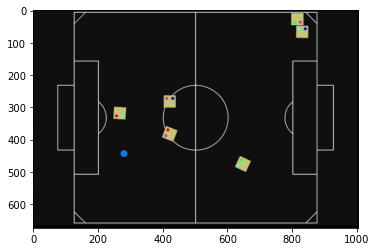

In [3]:
robots = cv2.imread('Robots.png')
plt.imshow(robots)
plt.show()

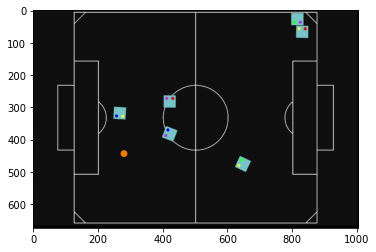

In [4]:
robots = cv2.cvtColor(robots, cv2.COLOR_BGR2RGB)
plt.imshow(robots)
plt.show()

In [5]:
hsv_robots = cv2.cvtColor(robots, cv2.COLOR_RGB2HSV)

In [145]:
for i in range(1,5,1):
    print(i)

1
2
3
4


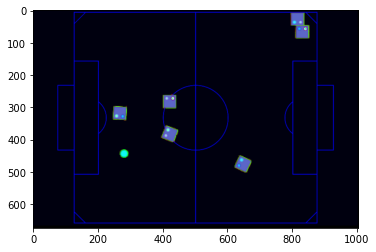

In [6]:
plt.imshow(hsv_robots)

# Robots Mask

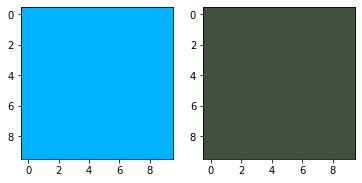

In [21]:
from matplotlib.colors import hsv_to_rgb

robot_low = (80, 50, 80)
robot_high =  (140, 255, 255)

lo_square = np.full((10, 10, 3), robot_low, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), robot_high, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

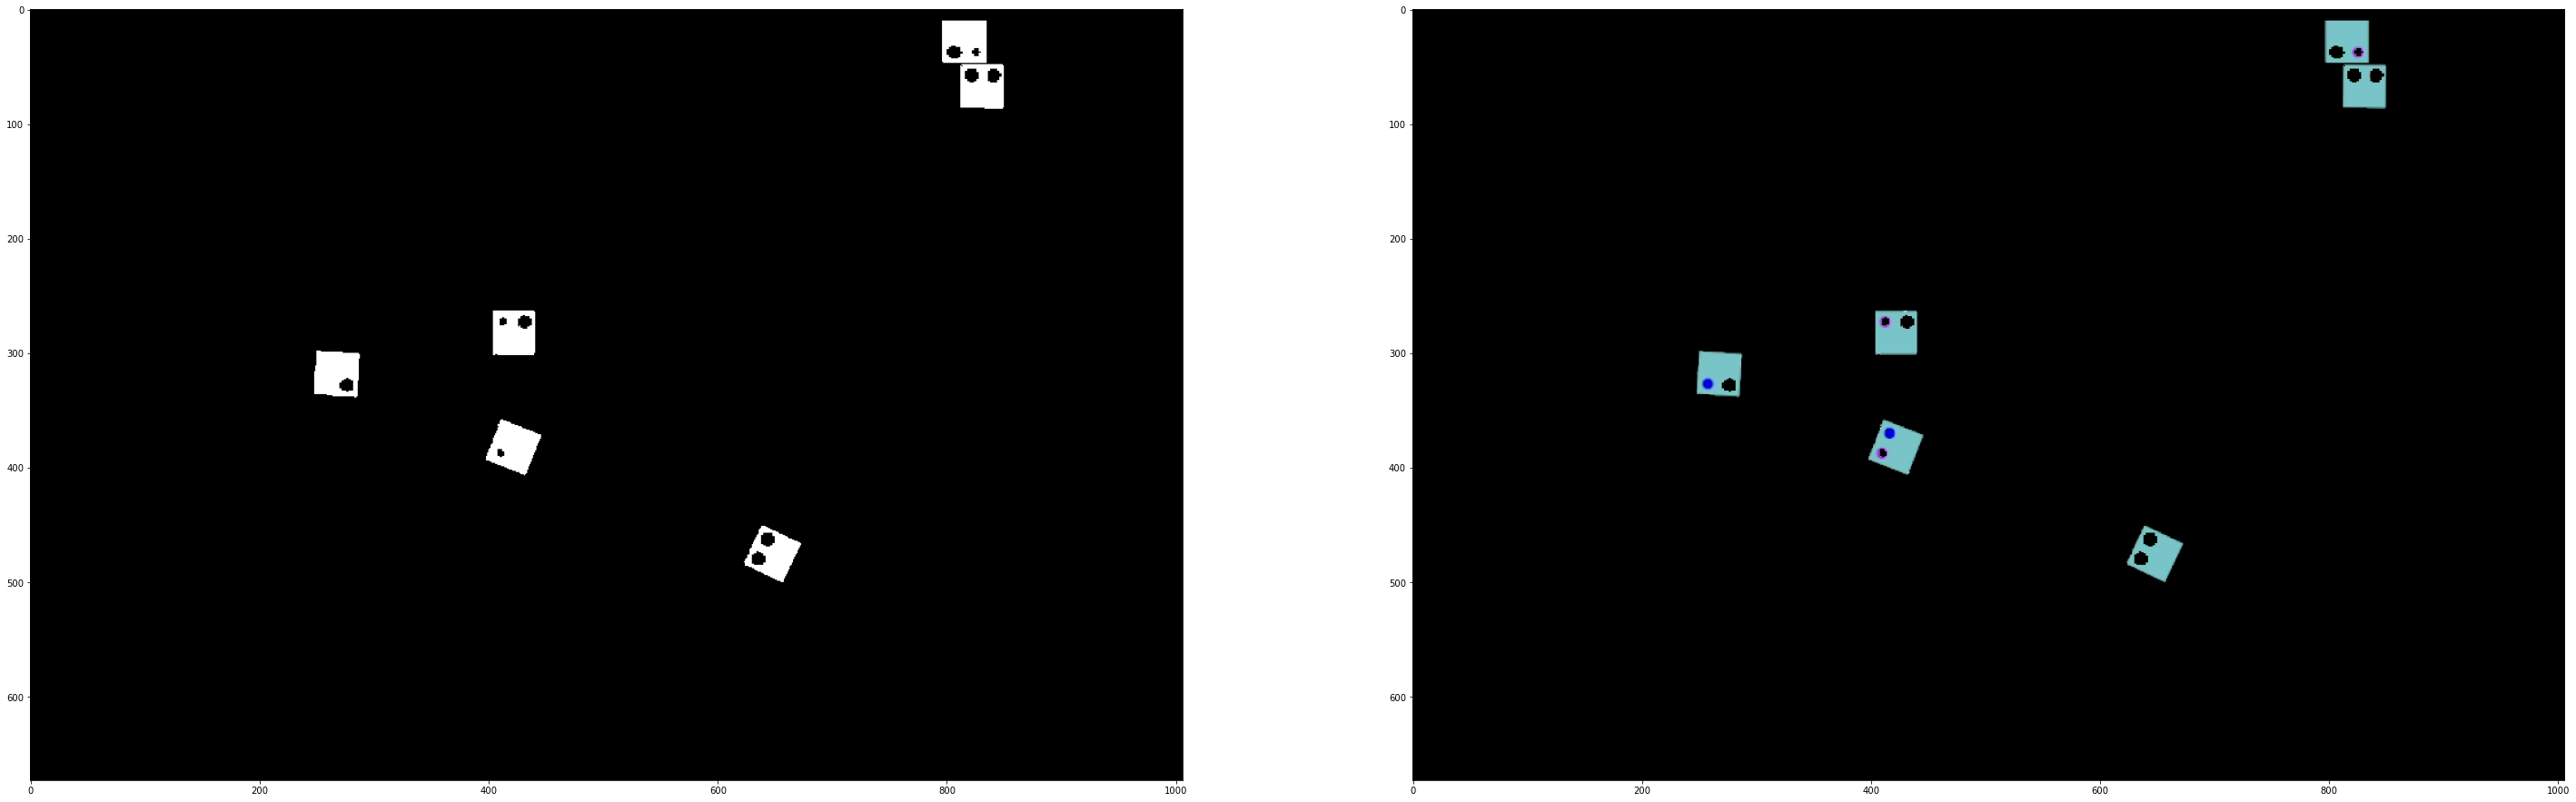

In [93]:
mask = cv2.inRange(hsv_robots, robot_low, robot_high)

result = cv2.bitwise_and(robots, robots, mask=mask)
plt.figure(figsize=(50, 50))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

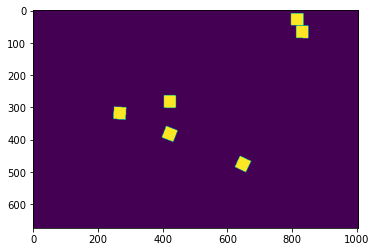

In [94]:
# Fill holes
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
filled_mask = mask
for pic, contour in enumerate(contours):
    cv2.fillPoly(filled_mask, pts=[contour], color=(255, 255, 255))

plt.imshow(filled_mask)      

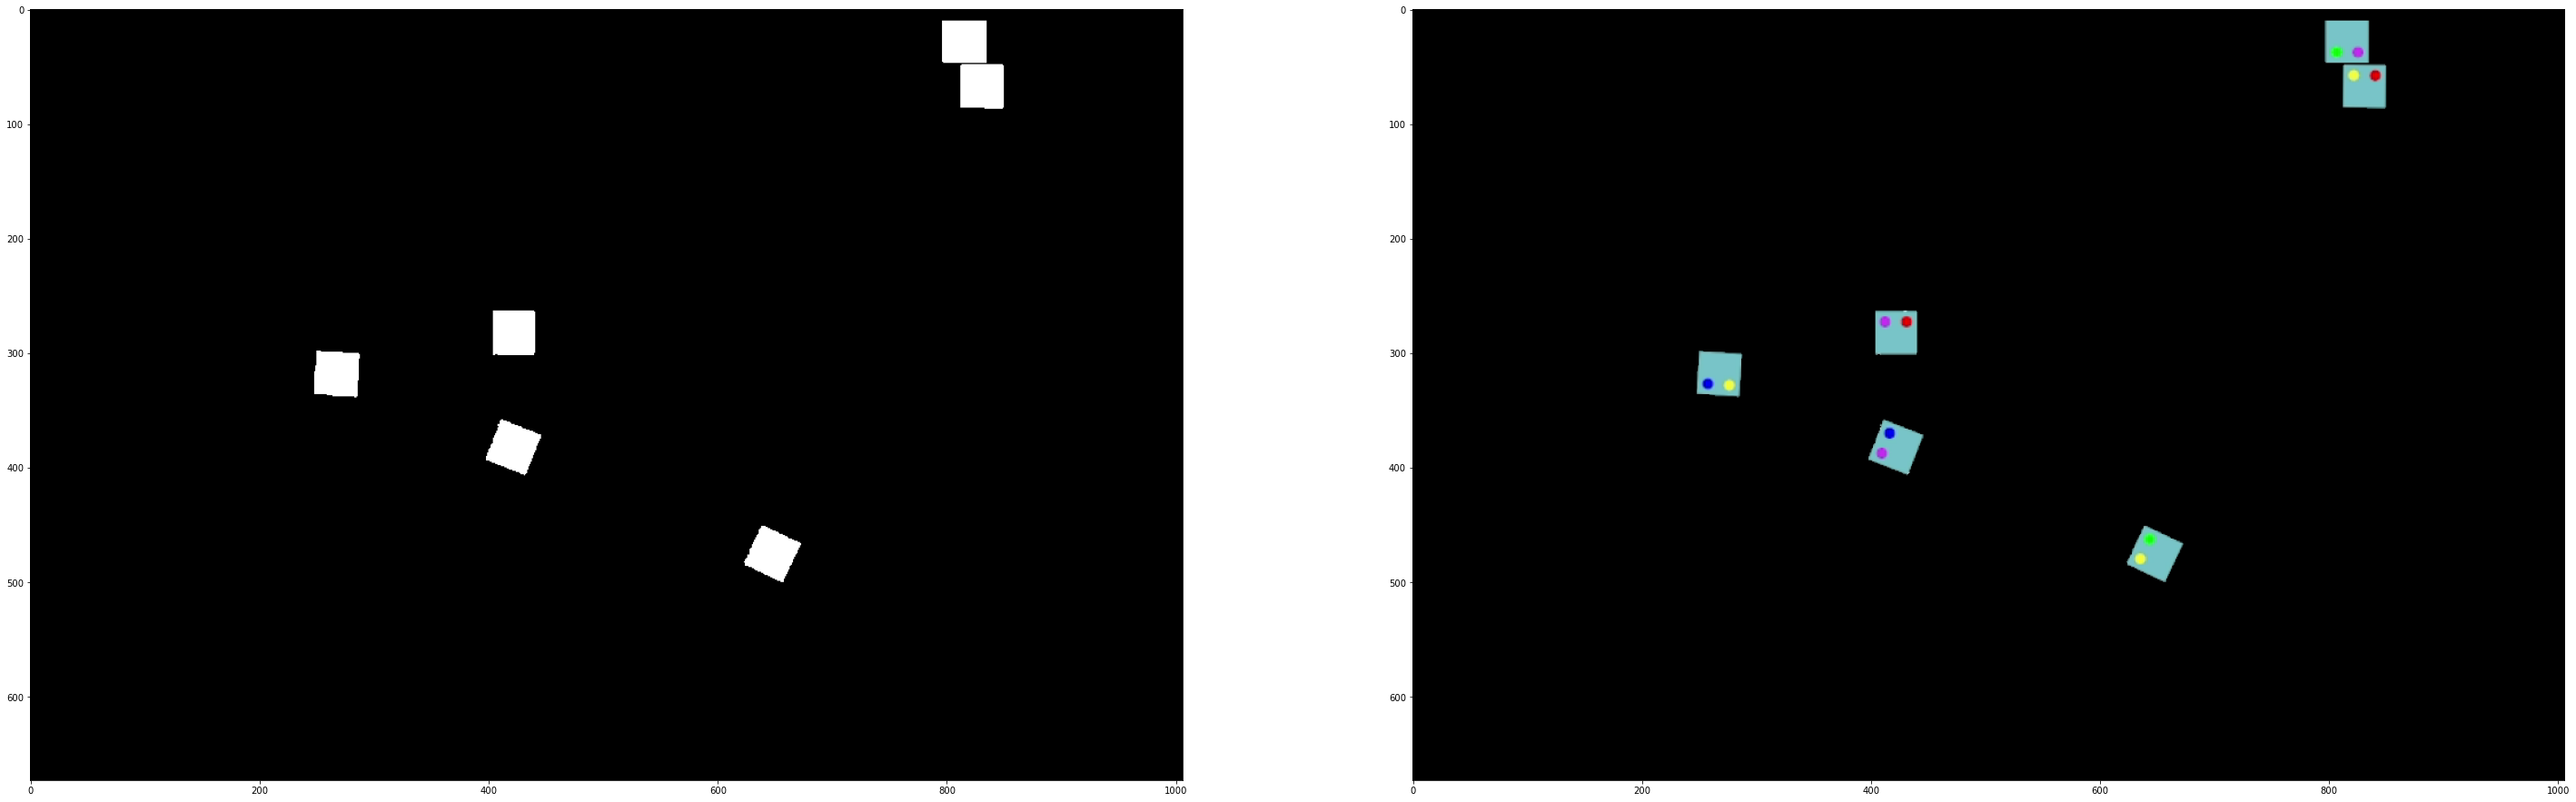

In [95]:
result = cv2.bitwise_and(robots, robots, mask=filled_mask)
plt.figure(figsize=(50, 50))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [96]:
robots_contours, _      = cv2.findContours(filled_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
robots_contours_poly    = [None]*len(robots_contours)
robots_boundRect        = [None]*len(robots_contours)
robots_centers          = [None]*len(robots_contours)
robots_radius           = [None]*len(robots_contours)
for i, c in enumerate(robots_contours):
    robots_contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    robots_boundRect[i] = cv2.boundingRect(robots_contours_poly[i])
    robots_centers[i], robots_radius[i] = cv2.minEnclosingCircle(robots_contours_poly[i])

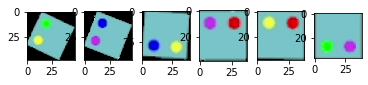

In [98]:
robots_cropped = [None]*len(robots_contours)

for i, c in enumerate(robots_contours):
    robots_cropped[i] = result[robots_boundRect[i][1]:robots_boundRect[i][1] + robots_boundRect[i][3], robots_boundRect[i][0]:robots_boundRect[i][0] + robots_boundRect[i][2]].copy()
    plt.subplot(1, 6, i + 1)
    plt.imshow(robots_cropped[i])

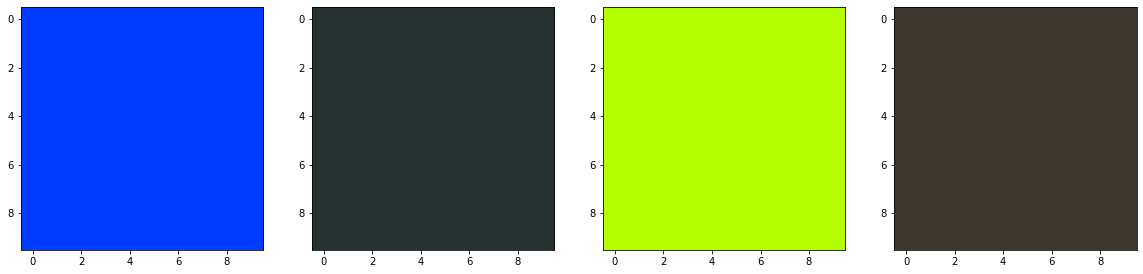

In [115]:
from matplotlib.colors import hsv_to_rgb
# Limits for team yellow
t1_color = [(130, 50, 50), (160, 255, 255)]     # Purple ish
t2_color = [(30, 50, 60), (55, 255, 255)]       # Yellow-ish
teams_colors = [t1_color, t2_color]

t1_square = [(np.full((10, 10, 3), t1_color[0], dtype=np.uint8) / 255.0), (np.full((10, 10, 3), t1_color[1], dtype=np.uint8) / 255.0)]
t2_square = [(np.full((10, 10, 3), t2_color[0], dtype=np.uint8) / 255.0), (np.full((10, 10, 3), t2_color[1], dtype=np.uint8) / 255.0)]

plt.figure(figsize=(20, 20))
plt.subplot(2, 4, 1)
plt.imshow(hsv_to_rgb(t1_square[1]))
plt.subplot(2, 4, 2)
plt.imshow(hsv_to_rgb(t1_square[0]))
plt.subplot(2, 4, 3)
plt.imshow(hsv_to_rgb(t2_square[1]))
plt.subplot(2, 4, 4)
plt.imshow(hsv_to_rgb(t2_square[0]))

plt.show()

In [132]:
def robot_present(img, threshold=0.8):
    total = np.float(np.sum(img))
    if total/img.size  > (1-threshold):
       return True
    else:
       return False

<ipython-input-132-5e86f68e215b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total = np.float(np.sum(img))
t1 [1, 3, 5]  t2 [0, 2, 4] 


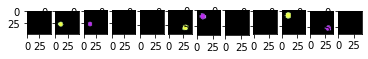

In [149]:
counter = 1
t1_robots = []
t2_robots = []

for i, c in enumerate(robots_cropped):
    img_hsv = cv2.cvtColor(robots_cropped[i], cv2.COLOR_RGB2HSV)
    # Apply color filter of teams to determine robot team
    for j in range(len(teams_colors)):
        mask = cv2.inRange(img_hsv, teams_colors[j][0], teams_colors[j][1]) 
        result = cv2.bitwise_and(robots_cropped[i], robots_cropped[i], mask=mask)
        # Classify by teams
        if robot_present(result):
            if j == 0:
                t1_robots.append(i)
            else:
                t2_robots.append(i)
        plt.subplot(1, 12, counter) # this can be deleted
        plt.imshow(result)
        counter = counter + 1
print("t1 {}  t2 {} ".format(t1_robots, t2_robots))

In [103]:
robots_cropped_hsv      = [None]*len(robots_cropped)
robots_cropped_masks    = [None]*len(robots_cropped)
for i, img in enumerate(robots_cropped):
    robots_cropped_hsv[i] = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    for j in range(len(teams_colors)):
        robots_cropped_masks[i] = cv2.inRange(im1_hsv, teams_colors[i][0], teams_colors[i][1])

IndexError: list index out of range

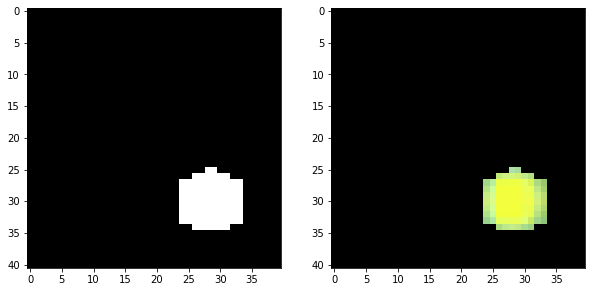

In [78]:
im1_hsv = cv2.cvtColor(robots_cropped[2], cv2.COLOR_RGB2HSV)

mask = cv2.inRange(im1_hsv, teams_colors[1][0], teams_colors[1][1])

result = cv2.bitwise_and(robots_cropped[2], robots_cropped[2], mask=mask)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [63]:
robot_contours, _     = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
robot_contours_poly   = [None]*len(robot_contours)
robot_boundRect       = [None]*len(robot_contours)
robot_centers         = [None]*len(robot_contours)
robot_radius          = [None]*len(robot_contours)
for i, c in enumerate(robot_contours):
    robot_contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    robot_boundRect[i] = cv2.boundingRect(robot_contours_poly[i])
    robot_centers[i], robot_radius[i] = cv2.minEnclosingCircle(robot_contours_poly[i])

In [64]:
robot_centers

[(11.414633750915527, 28.365854263305664), (19.0, 11.0)]

In [65]:
# Resulting color is yelllow
r = im1[int(robot_centers[0][1])][int(robot_centers[0][0])][0]
g = im1[int(robot_centers[0][1])][int(robot_centers[0][0])][1]
b = im1[int(robot_centers[0][1])][int(robot_centers[0][0])][2]
print("{} {} {}".format(r, g, b))

244 253 62


In [66]:
r = im1[int(robot_centers[1][1])][int(robot_centers[1][0])][0]
g = im1[int(robot_centers[1][1])][int(robot_centers[1][0])][1]
b = im1[int(robot_centers[1][1])][int(robot_centers[1][0])][2]
print("{} {} {}".format(r, g, b))

20 255 9


In [90]:
# if not contours:
#     print("No Role or Team found")
# else:
x1 = abs(robot_centers[0][0] - robot_centers[1][0]) / 2 + robot_centers[0][0]
y1 = abs(robot_centers[0][1] - robot_centers[1][1]) / 2 + robot_centers[1][1]
y1 = -y1
x2 = im1.shape[0]/2
y2 = -im1.shape[1]/2
print("{} {}".format(x1, y1))

15.207316875457764 -19.682927131652832


In [91]:
m = (y2 - y1) / (x2 - x1)
m

-0.5183726598430053

In [94]:
import math
myradians = math.atan2(y1-y2, x1-x2)
mydegrees = math.degrees(myradians)
print(mydegrees)

2.66335518146758


In [68]:
im1.shape

(49, 49, 3)

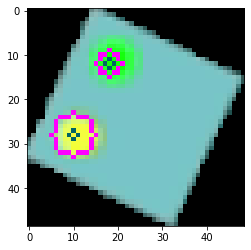

In [14]:
gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)

rows = gray.shape[0]

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=10, param2=15,
                            minRadius=1, maxRadius=8)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im1, center, 1, (0, 100, 100), 1)
        # circle outline
        radius = i[2]
        cv2.circle(im1, center, radius, (255, 0, 255), 1)


plt.imshow(im1)

In [148]:
robots_centers[0][0]

647.7635498046875